<a href="https://colab.research.google.com/github/gorzanskik-ai/machine-learning/blob/main/supervised-learning/02_regression/03_linear_regression_R2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
np.set_printoptions(precision=6, suppress=True, edgeitems=30, linewidth=120, 
                    formatter=dict(float=lambda x: f'{x:.2f}'))
sns.set(font_scale=1.3)
sklearn.__version__

'1.0.2'

In [2]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, n_targets=1, noise=30.0, random_state=42)
print(X.shape)
print(y.shape)

(100, 1)
(100,)


[]

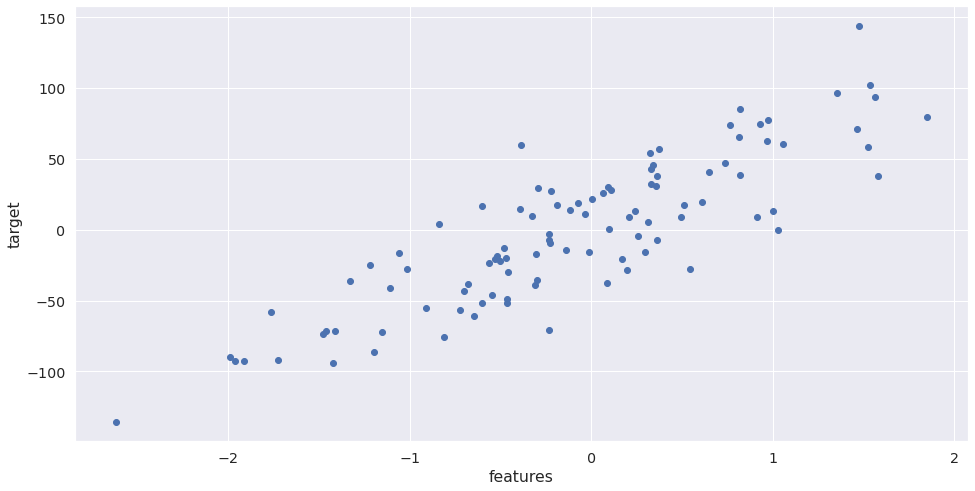

In [6]:
plt.figure(figsize=(16, 8))
plt.xlabel('features')
plt.ylabel('target')
plt.scatter(X, y)
plt.plot()

Regresja liniowa

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [10]:
lr.score(X, y)  #domyślnie metryka to R2 score
#jak dobrze dopasowany jest model -> im bliżej 1 tym lepiej

0.7426670084336404

In [12]:
y_pred = lr.predict(X)  #predykcja targetów na podstawie cech
y_pred

array([49.90, 7.83, -49.21, 19.15, -20.38, 35.77, -19.60, 30.53, 33.97, 53.50, 44.45, 80.13, 40.29, -7.45, -36.79,
       8.07, -94.15, 29.07, 54.87, -127.04, 28.25, 8.33, -19.71, 49.11, 81.46, 76.53, -26.43, 1.71, -26.49, -56.11,
       21.29, 22.22, 16.50, -22.90, -41.75, 13.30, -11.40, 21.52, 44.48, -11.04, 21.50, -30.24, 79.39, -22.33, -8.17,
       -16.04, -11.51, -28.65, 19.88, 13.90, -12.83, 3.75, -8.17, 77.14, -15.69, 20.62, 20.00, -5.76, -8.19, -95.54,
       19.64, -7.75, -51.63, -31.49, -69.43, 51.76, -82.46, -91.84, -24.52, 41.74, 43.98, -66.88, -70.18, -57.34,
       -38.32, 82.19, 52.11, 15.55, 18.25, -23.63, -84.36, 9.02, 12.03, -62.69, 56.17, -2.27, -19.90, 2.82, -46.97,
       -3.39, -53.86, 71.08, 6.86, -21.51, -19.46, 95.79, -67.50, -32.37, -0.09, -11.91])

[]

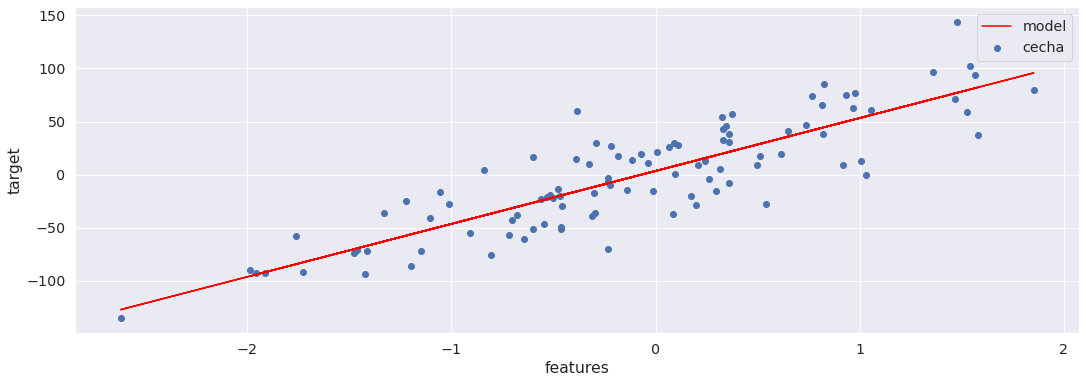

In [15]:
plt.figure(figsize=(18, 6))
plt.xlabel('features')
plt.ylabel('target')
plt.scatter(X, y, label='cecha')
plt.plot(X, y_pred, color='red', label='model')
plt.legend()
plt.plot()

In [16]:
lr.coef_

array([49.83])

In [17]:
lr.intercept_

3.4953459615809175

Podział danych na zbiór treningowy i testowy

In [19]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=1000, n_features=1, n_targets=1, noise=15, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (750, 1)
y_train shape: (750,)
X_test shape: (250, 1)
y_test shape: (250,)


[]

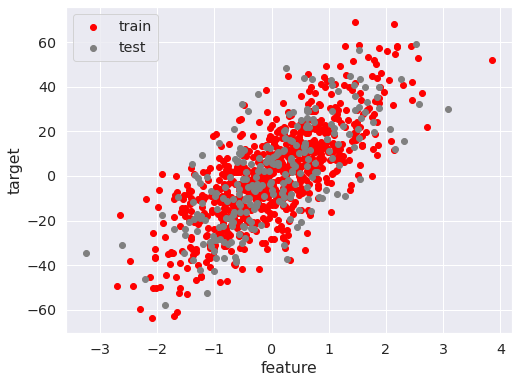

In [22]:
plt.figure(figsize=(8, 6))
plt.xlabel('feature')
plt.ylabel('target')
plt.scatter(X_train, y_train, color='red', label='train')
plt.scatter(X_test, y_test, color='grey', label='test')
plt.legend()
plt.plot()

In [25]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.5550440098049001

In [26]:
lr.score(X_test, y_test)

0.5108438585354155

In [27]:
y_pred = lr.predict(X_test)

Zbiór treningowy

[]

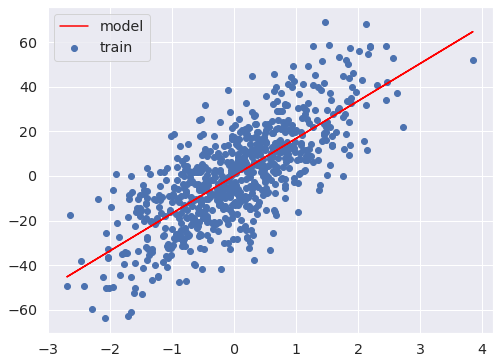

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, label='train')
plt.plot(X_train, lr.intercept_ + X_train*lr.coef_[0], color='red', label='model')
plt.legend()
plt.plot()

Zbiór testowy

[]

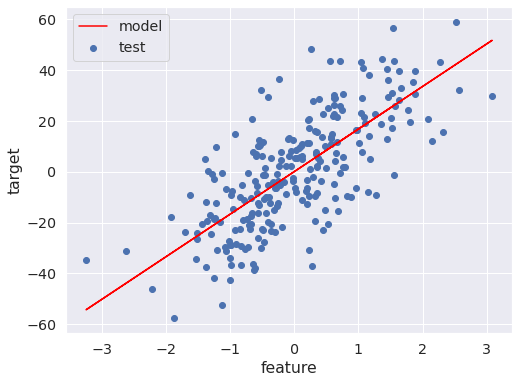

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='test')
plt.plot(X_test, y_pred, color='red', label='model')
plt.xlabel('feature')
plt.ylabel('target')
plt.legend()
plt.plot()

[]

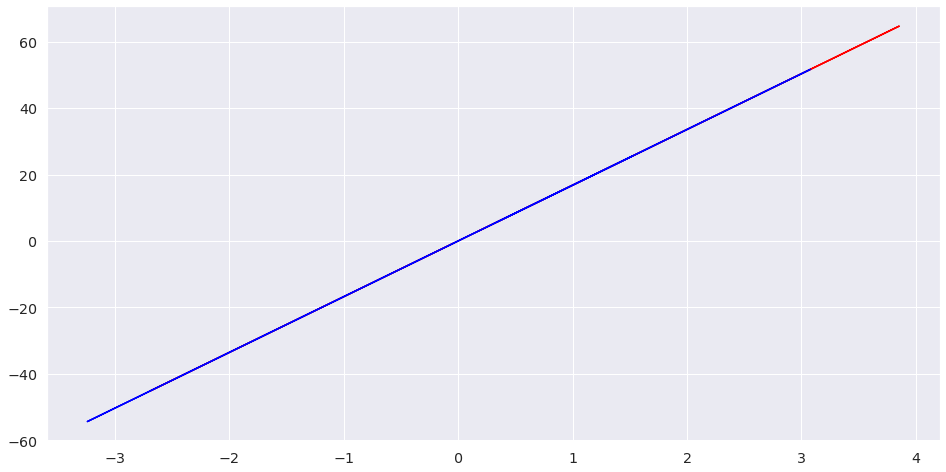

In [36]:
plt.figure(figsize=(16, 8))
plt.plot(X_train, lr.intercept_ + lr.coef_*X_train, color='red', label='model')
plt.plot(X_test, y_pred, color='blue', label='model')
plt.plot()

Predykcje

In [41]:
predictions = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})
predictions['error'] = predictions['y_true'] - predictions['y_pred']
predictions['(y_true - y_pred)^2'] = predictions['error'] ** 2
predictions.head()

,y_true,y_pred,error,(y_true - y_pred)^2
0,30.876983,25.601338,5.275646,27.832437
1,1.850537,5.954600,-4.104063,16.843332
2,30.604981,31.624589,-1.019608,1.039601
3,-9.092543,-16.490844,7.398301,54.734862
4,-36.311708,-10.800495,-25.511212,650.821948


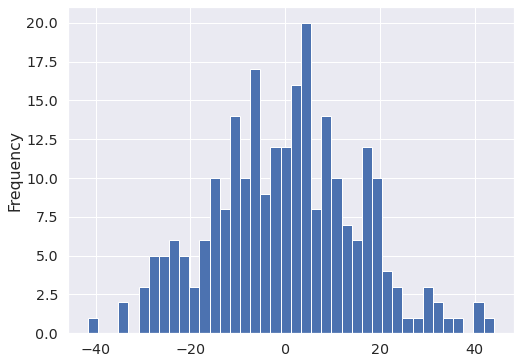

In [45]:
predictions['error'].plot(kind='hist', bins=40, figsize=(8, 6))